In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!unzip ../data/raw/filtered_paranmt.zip

Archive:  ../data/raw/filtered_paranmt.zip
  inflating: filtered.tsv            


In [3]:
data_path = "filtered.tsv"
df = pd.read_csv(data_path, sep='\t', index_col=0)
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


# Toxicity of the sentences

Let's check how the `ref_tox` and `trn_tox` are distributed

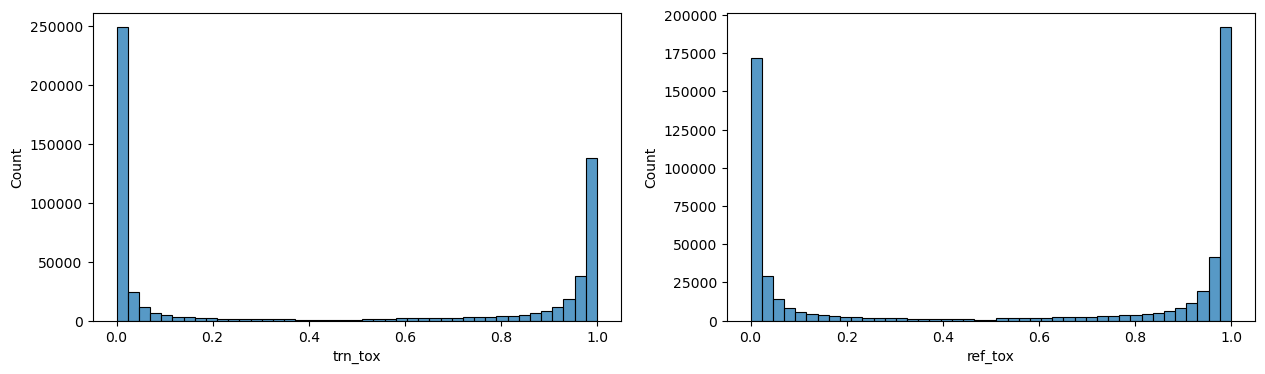

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(df['trn_tox'], ax=axs[0])
sns.histplot(df['ref_tox'], ax=axs[1]);

We see that `trn_tox` and `ref_tox` are in the range from 0 to 1. Let's transform the dataset so that one column contains toxic phrases, and the second contains neutral phrases.

In [5]:
df['toxic'] = df.apply(lambda x: x['reference'] if x['ref_tox'] > x['trn_tox'] else x['translation'], axis=1)
df['detoxified'] = df.apply(lambda x: x["translation"] if x['ref_tox'] > x['trn_tox'] else x['reference'], axis=1)
df['tox_tox'] = df.apply(lambda x: x["ref_tox"] if x['ref_tox'] > x['trn_tox'] else x['trn_tox'], axis=1)
df['detox_tox'] = df.apply(lambda x: x["trn_tox"] if x['ref_tox'] > x['trn_tox'] else x['ref_tox'], axis=1)
df.drop(columns=['reference', 'translation', 'trn_tox', 'ref_tox'], inplace=True)

In [6]:
df.head()

,similarity,lenght_diff,toxic,detoxified,tox_tox,detox_tox
0,0.785171,0.010309,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.981983,0.014195
1,0.749687,0.071429,you're becoming disgusting.,Now you're getting nasty.,0.999039,0.065473
2,0.919051,0.268293,"well, we can spare your life.","Well, we could spare your life, for one.",0.985068,0.213313
3,0.664333,0.309524,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.994215,0.053362
4,0.726639,0.181818,I have orders to kill her.,I've got orders to put her down.,0.999348,0.009402


<Axes: xlabel='detox_tox', ylabel='Count'>

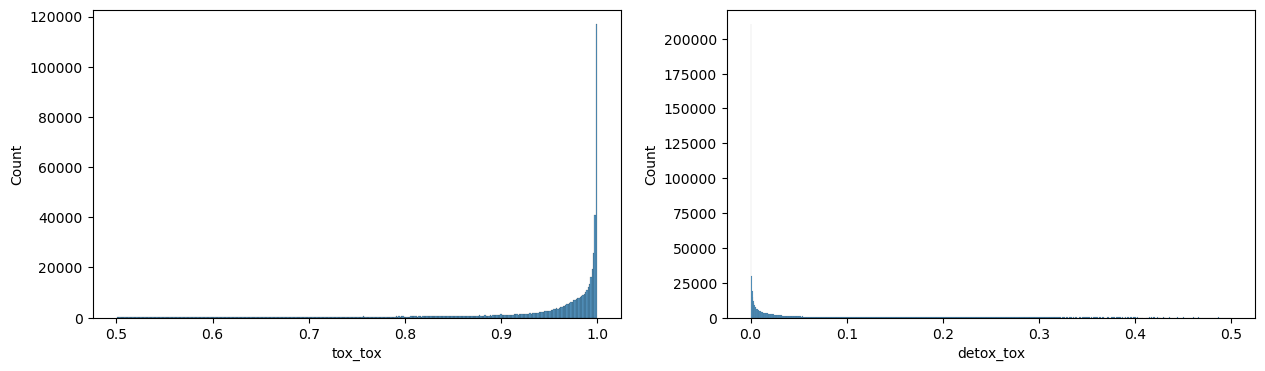

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(df['tox_tox'], ax=axs[0])
sns.histplot(df['detox_tox'], ax=axs[1])

# Exploring toxicity level of the neutral sentences

Let's find out how many sentences there are, where after detoxification there is a high level of toxicity, and sentences where the difference in toxicity is small.

## Toxicity difference

In [8]:
df['tox_diff'] = df['tox_tox'] - df['detox_tox']

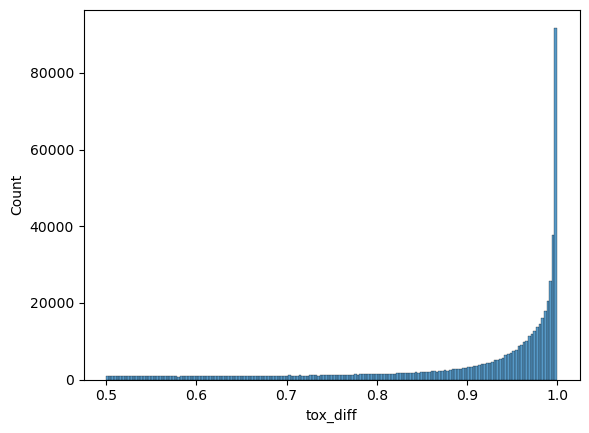

In [9]:
sns.histplot(df['tox_diff']);

There are some results where `tox_diff` is small, let's check it

In [10]:
df_tox_diff = df[df['tox_diff'] < 0.6]

In [11]:
df_tox_diff.sort_values(by='tox_diff')

,similarity,lenght_diff,toxic,detoxified,tox_tox,detox_tox,tox_diff
302957,0.744230,0.089286,I'm going to let it pass through the mass spec...,Fine. I'm gonna run this through the mass spec...,0.508555,0.008553,0.500002
274475,0.717746,0.228916,"""I'll tie you up, I'll put the cuffs on you, I...","""I'm going to tie you up. ""I'm going to handcu...",0.592993,0.092991,0.500002
368899,0.778185,0.307692,I smothered her to death.,I suffocated her.,0.994705,0.494704,0.500002
321294,0.894869,0.151515,"""if you can kill the fires of fire, we will fo...","""If you can kill the fire plants, we will wors...",0.936176,0.436173,0.500002
128885,0.802599,0.076923,"remember, she must not be harmed, or she will ...","Remember, she's not to be harmed... or she's w...",0.922565,0.422561,0.500004
...,...,...,...,...,...,...,...
175252,0.738857,0.023810,You're a kos'kari trying to lure me away.,"you're a coconut, trying to lure me out.",0.620493,0.020504,0.599989
191463,0.922523,0.142857,I need you to put your head back and open your...,I'm gonna need you to hold your head back and ...,0.881825,0.281834,0.599991
411458,0.686416,0.050000,"Darker. All I know is, back there, killing tho...",all I know is that in the killing of those vam...,0.612521,0.012525,0.599995
15336,0.743004,0.189189,I don’t want to see any of you hurt.,I don't want you to get hurt.,0.605983,0.005988,0.599995


In the dataset, all `tox_diff` values are greater than 0.5. In most cases, this applies to cases where the quality of detoxification is unsatisfactory or the style of the sentence is close to neutral. I think that for training purpose we need only the cases with quality of detoxification, that's why I will remove such cases, where the toxicity of transformed sentence is high.

## Cleaning data

I remain only data where `detox_tox` less than 0.35 and `tox_diff` greater 0.6 - where quality of detoxification is good

In [12]:
df = df[(df['detox_tox'] < 0.35) & (df['tox_diff'] > 0.6)]

# Saving the dataframes

I plan to train 2 models, one for detoxification, the second for determining toxicity. In order to do it, I create two datasets, one only with toxic and non-toxic sentences, and second with all sentences and toxicity levels

In [13]:
detox_df = df[['toxic', 'detoxified']]
detox_df.to_csv('../data/interim/tox_sentences.csv', index=None)

In [14]:
sentence_toxicity_level = []
for _, row in df.iterrows():
    sentence_toxicity_level.append([row['toxic'], row['tox_tox']])
    sentence_toxicity_level.append([row['detoxified'], row['detox_tox']])

In [15]:
toxicity = pd.DataFrame(sentence_toxicity_level, columns=['text', 'tox_level'])
toxicity.to_csv('../data/interim/toxicity_levels.csv', index=None)

In [16]:
!zip ../data/interim/tox_sentences.zip ../data/interim/tox_sentences.csv
!zip ../data/interim/toxicity_levels.zip ../data/interim/toxicity_levels.csv

  adding: ../data/interim/tox_sentences.csv (deflated 62%)
  adding: ../data/interim/toxicity_levels.csv (deflated 57%)
